# Análisis Estadístico


Análisis del rendimiento general de cada equipo a lo largo de las temporadas desde 2016 hasta 2023. Incluiré el total de victorias derrotas, empates, goles a favor, goles en contra, y el porcentaje de victorias, empates y derrotas.

In [1]:
import pandas as pd

archivos = [
    'datos_limpios/champions_2016_2017.csv',
    'datos_limpios/champions_2017_2018.csv',
    'datos_limpios/champions_2018_2019.csv',
    'datos_limpios/champions_2019_2020.csv',
    'datos_limpios/champions_2020_2021.csv',
    'datos_limpios/champions_2021_2022.csv',
    'datos_limpios/champions_2022_2023.csv'
]

#Leer y almacenar el contenido de los archivos
dfs = [pd.read_csv(archivos) for archivos in archivos]

#Verificar primeras filas de cada df para ver estructura
dfs_vista = [df.head() for df in dfs]
dfs_vista[0]


,SEASON,HOME_TEAM,AWAY_TEAM,HT_SCORE,AW_SCORE
0,2016,FC Basel,PFC Ludogorets Razgrad,1,1
1,2016,Paris Saint-Germain,Arsenal FC,1,1
2,2016,Arsenal FC,FC Basel,2,0
3,2016,PFC Ludogorets Razgrad,Paris Saint-Germain,1,3
4,2016,Arsenal FC,PFC Ludogorets Razgrad,6,0


In [2]:
#Unir dataframes en uno
df_todos = pd.concat(dfs, ignore_index=True)

#Funcion para determinar el resultado de cada partido
def resultado_partido(fila):
    if fila['HT_SCORE'] > fila['AW_SCORE']:
        return 'Victoria local'
    elif fila['HT_SCORE'] < fila['AW_SCORE']:
        return 'Victoria visitante'
    else: 
        return 'Empate'
    
#Aplicar funcion para resultado de cada partido
df_todos['RESULT'] = df_todos.apply(resultado_partido, axis=1)

#Separar partidos por equipo
local = df_todos.groupby('HOME_TEAM').agg({'HT_SCORE': ['sum'], 'AW_SCORE': ['sum'], 'RESULT': ['count', lambda x: (x == 'Victoria local').sum(), lambda x: (x == 'Empate').sum(), lambda x: (x == 'Victoria Visitante').sum()]})
visitante = df_todos.groupby('AWAY_TEAM').agg({'AW_SCORE': ['sum'], 'HT_SCORE': ['sum'], 'RESULT': ['count', lambda x: (x == 'Victoria visitante').sum(), lambda x: (x == 'Empate').sum(), lambda x: (x == 'Victoria local').sum()]})

#Renombrar columnas
local.columns = ['Goles a favor', 'Goles en contra', 'Partidos jugados', 'Victorias', 'Empates', 'Derrotas']
visitante.columns = ['Goles a favor', 'Goles en contra', 'Partidos jugados', 'Victorias', 'Empates', 'Derrotas']

#Unificar estadisticas local y visitante
estadisticas = local.add(visitante, fill_value=0)

#Calular porcentajes de victoria, empate y derrota
estadisticas['Porcentaje Victoria'] = (estadisticas['Victorias'] / estadisticas['Partidos jugados']) * 100
estadisticas['Porcentaje Empate'] = (estadisticas['Empates'] / estadisticas['Partidos jugados']) * 100
estadisticas['Porcentaje Derrota'] = (estadisticas['Derrotas'] / estadisticas['Partidos jugados']) * 100

estadisticas.reset_index(inplace=True)
estadisticas.rename(columns={'index': 'Equipo'}, inplace=True)

#Ordenar por porcentaje de victoria
estadisticas.sort_values(by='Porcentaje Victoria', ascending=False, inplace=True)



#guardar a csv
estadisticas.to_csv('datos_limpios/estadisticas_champions.csv', index=False)

estadisticas.head(50)

,HOME_TEAM,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota
13,Bayern München,192,65,71,52,9,6,73.239437,12.676056,8.450704
48,Manchester City,175,75,75,48,14,8,64.000000,18.666667,10.666667
62,Real Madrid,174,97,79,49,12,11,62.025316,15.189873,13.924051
44,Liverpool FC,144,72,65,40,9,11,61.538462,13.846154,16.923077
38,Juventus,102,65,63,37,9,9,58.730159,14.285714,14.285714
25,FC Barcelona,116,73,61,34,13,9,55.737705,21.311475,14.754098
56,Paris Saint-Germain,143,76,63,35,11,10,55.555556,17.460317,15.873016
19,Chelsea FC,85,51,49,27,10,7,55.102041,20.408163,14.285714
42,Leicester City,11,10,10,5,2,3,50.000000,20.000000,30.000000
4,AFC Ajax,74,50,38,19,7,3,50.000000,18.421053,7.894737


### Visualizaciones

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Configuracion seaborn
sns.set(style='whitegrid')

C:\Users\alvde\AppData\Local\Temp\ipykernel_21024\2663249496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goles a favor', y='HOME_TEAM', data=goles_afavor, palette='viridis')


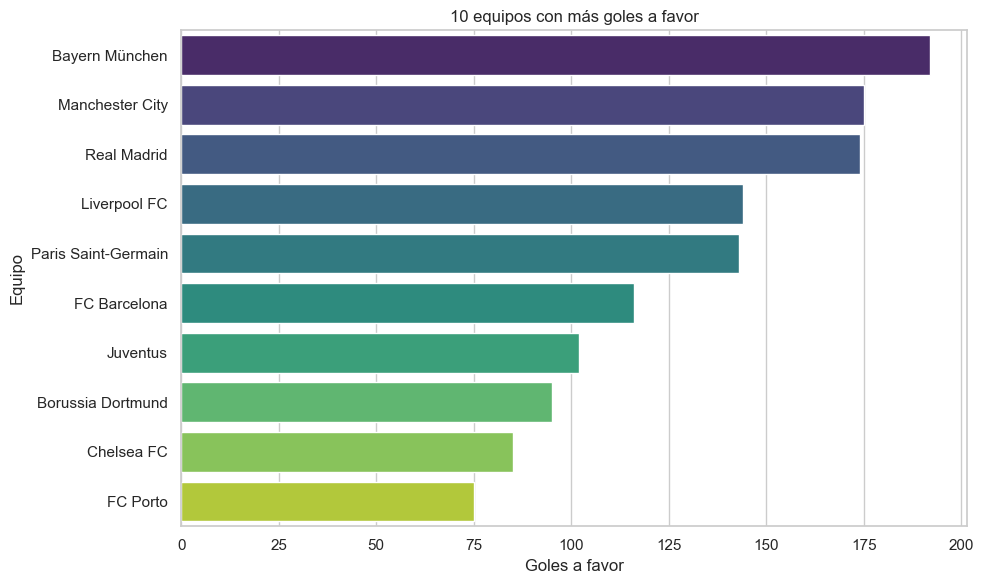

In [4]:
#Grafica de los 10 equipos con más goles a favor
plt.figure(figsize=(10, 6))
goles_afavor = estadisticas.sort_values(by='Goles a favor', ascending=False).head(10)
sns.barplot(x='Goles a favor', y='HOME_TEAM', data=goles_afavor, palette='viridis')
plt.title('10 equipos con más goles a favor')
plt.xlabel('Goles a favor')
plt.ylabel('Equipo')
plt.tight_layout()
plt.show()

C:\Users\alvde\AppData\Local\Temp\ipykernel_21024\2919930176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goles en contra', y='HOME_TEAM', data=goles_encontra, palette='viridis')


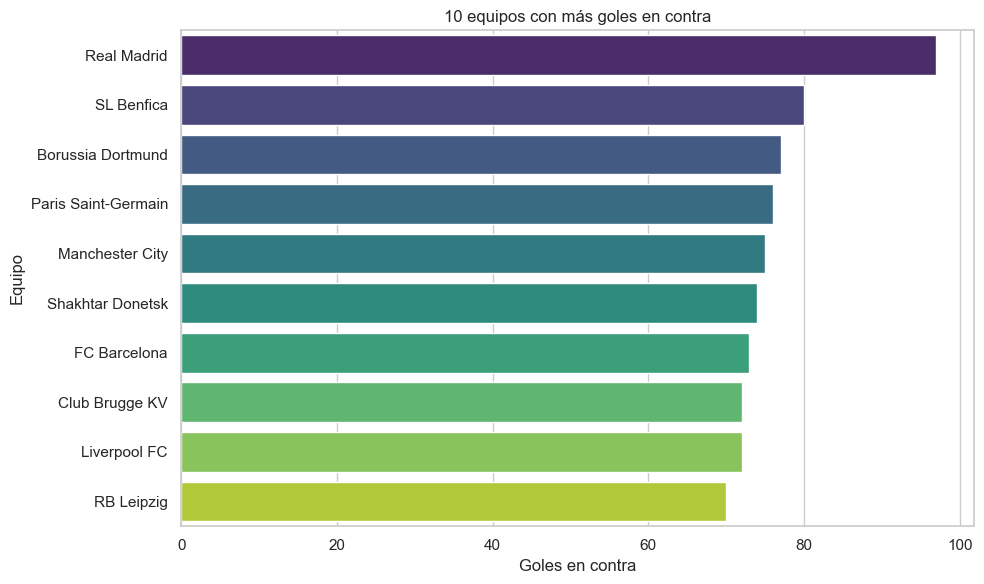

In [5]:
#Grafica de los 10 equipos con más goles en contra
plt.figure(figsize=(10, 6))
goles_encontra = estadisticas.sort_values(by='Goles en contra', ascending=False).head(10)
sns.barplot(x='Goles en contra', y='HOME_TEAM', data=goles_encontra, palette='viridis')
plt.title('10 equipos con más goles en contra')
plt.xlabel('Goles en contra')
plt.ylabel('Equipo')
plt.tight_layout()
plt.show()

C:\Users\alvde\AppData\Local\Temp\ipykernel_21024\1578475234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Porcentaje Victoria', y='HOME_TEAM', data=porcentaje_victoria, palette='viridis')


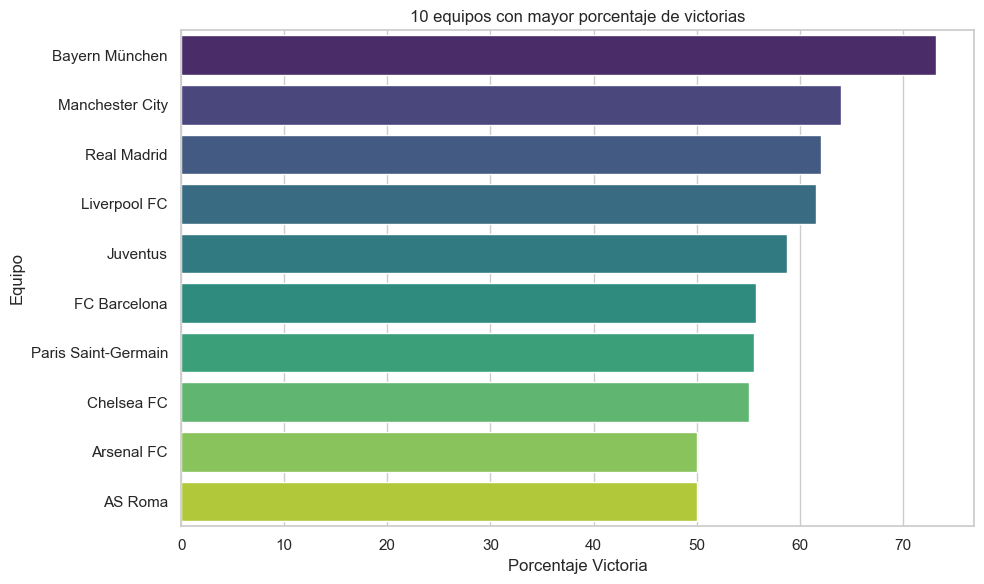

In [6]:
#Grafica de los 10 equipos con mayor porcentaje de victorias
plt.figure(figsize=(10, 6))
porcentaje_victoria = estadisticas.sort_values(by='Porcentaje Victoria', ascending=False).head(10)
sns.barplot(x='Porcentaje Victoria', y='HOME_TEAM', data=porcentaje_victoria, palette='viridis')
plt.title('10 equipos con mayor porcentaje de victorias')
plt.xlabel('Porcentaje Victoria')
plt.ylabel('Equipo')
plt.tight_layout()
plt.show()

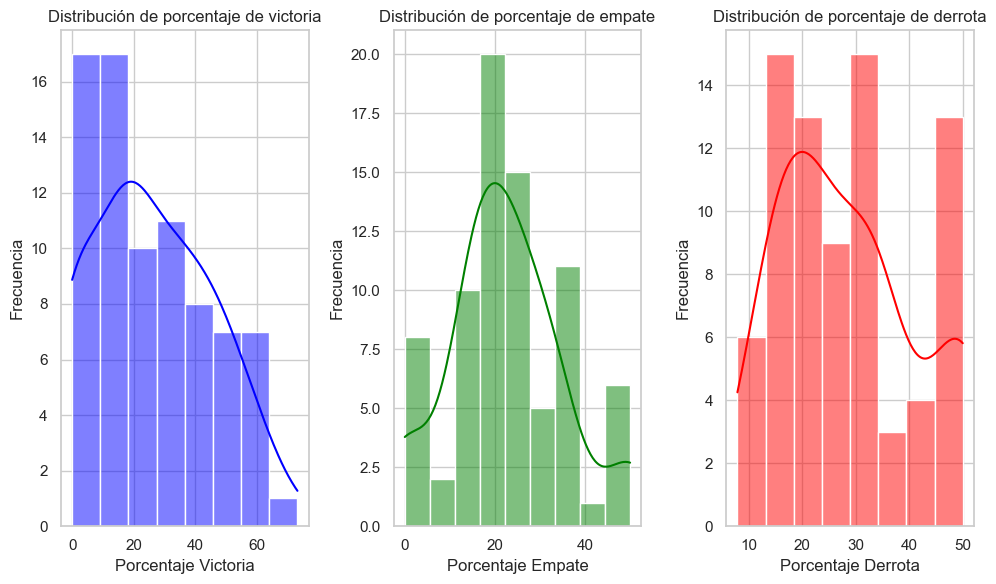

In [7]:
#Distribución de los porcentajes de victoria, empate y derrota
plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
sns.histplot(estadisticas['Porcentaje Victoria'], kde=True, color='blue')
plt.title('Distribución de porcentaje de victoria')
plt.xlabel('Porcentaje Victoria')
plt.ylabel('Frecuencia')

plt.subplot(1,3,2)
sns.histplot(estadisticas['Porcentaje Empate'], kde=True, color='green')
plt.title('Distribución de porcentaje de empate')
plt.xlabel('Porcentaje Empate')
plt.ylabel('Frecuencia')

plt.subplot(1,3,3)
sns.histplot(estadisticas['Porcentaje Derrota'], kde=True, color='red')
plt.title('Distribución de porcentaje de derrota')
plt.xlabel('Porcentaje Derrota')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Análisis de correlación

In [8]:
#Calcular la matriz de correlación para las variables interesantes
correlacion = estadisticas[['Goles a favor', 'Goles en contra', 'Porcentaje Victoria', 'Porcentaje Derrota']].corr()

correlacion

,Goles a favor,Goles en contra,Porcentaje Victoria,Porcentaje Derrota
Goles a favor,1.000000,0.836009,0.794294,-0.569787
Goles en contra,0.836009,1.000000,0.627090,-0.439685
Porcentaje Victoria,0.794294,0.627090,1.000000,-0.669742
Porcentaje Derrota,-0.569787,-0.439685,-0.669742,1.000000


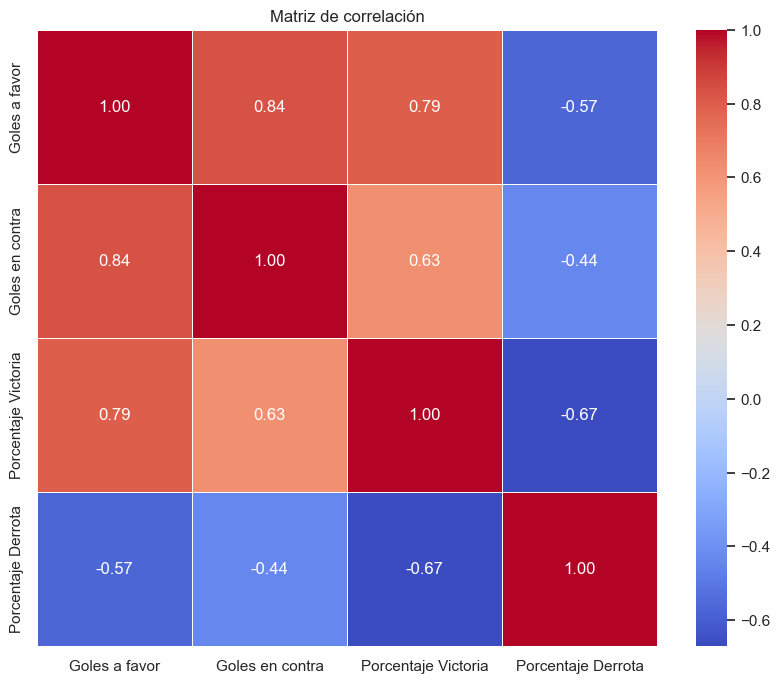

In [9]:
#Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

- Los colores rojos indican correlación positiva fuerte, mientras que los azules señalan correlación negativa.

- Las celdas con colores más intensos (tanto rojos como azules) destacan las correlaciones más fuertes, como entre goles a favor y % de victorias (r=0.79), y entre % de victorias y % de derrotas (r=-0.67)

- Las correlaciones moderadas se visualizan con tonos menos intensos, indicando una relación menos pronunciada entre las variables.

# Regresión Lineal

Voy a desarrollar un modelo de regresión lineal utilizando los datos históricos que he analizado para estimar el 'puntuaje de fuerza' de cada equipo. Va a representar la fuerza relativa de los equipos basada en goles a favor, goles en contra y porcentajes de victoria  derrota.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#Seleccionar variables independientes (predictores) y variable dependiente (objetivo)
X = estadisticas[['Goles a favor', 'Goles en contra', 'Porcentaje Victoria', 'Porcentaje Derrota']]
y = estadisticas['Porcentaje Victoria']

#Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Evaluar modelo usando el conjunto de prueba
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

(4.7449374163011664e-29, 1.0)

Voy a usar los resultados de la primera jornada de los octavos para estimar el 'Puntuaje de fuerza'. Supongo que los goles a favor son los goles marcados en la jornada, los goles en contra son los recibidos.
Para el % de victorias y derrotas, utilizaremos una aproximación simple:
- Si un equipo ganó, % de victorias = 100, % de derrotas = 0
- Si un equipo perdió, % de victorias = 0, % de derrotas = 100
-  Si fue un empate, % de victorias = 50, % de derrotas = 50

In [12]:
resultados_octavos={
    'FC København': [1, 'Manchester City', 3],
    'RB Leipzig': [0, 'Real Madrid', 1],
    'Paris Saint-Germain': [2, 'Real sociedad', 0],
    'Lazio Roma': [1, 'Bayern München', 0],
    'PSV Eindhoven': [1, 'Borussia Dortmund', 1],
    'Inter': [1, 'Atlético Madrid', 0],
    'FC Porto': [1, 'Arsenal FC', 0],
    'SSC Napoli': [1, 'FC Barcelona', 1],
}

#Crear dataframe con los resultados de los partidos de octavos de final
df_octavos = pd.DataFrame(resultados_octavos).T.reset_index()
df_octavos.columns = ['HOME_TEAM', 'HT_SCORE', 'AWAY_TEAM', 'AW_SCORE']
# Añadir la columna 'SEASON'
df_octavos['SEASON'] = 2023
df_octavos

,HOME_TEAM,HT_SCORE,AWAY_TEAM,AW_SCORE,SEASON
0,FC København,1,Manchester City,3,2023
1,RB Leipzig,0,Real Madrid,1,2023
2,Paris Saint-Germain,2,Real sociedad,0,2023
3,Lazio Roma,1,Bayern München,0,2023
4,PSV Eindhoven,1,Borussia Dortmund,1,2023
5,Inter,1,Atlético Madrid,0,2023
6,FC Porto,1,Arsenal FC,0,2023
7,SSC Napoli,1,FC Barcelona,1,2023


Vamos a proceder a realizar estadísticas de los equipos en la primera fase de octavos teniendo en cuenta los datos que tenemos de las ultimas 7 champions.


In [13]:
#Ajustar el enfoque para calcular el porcentaje de victoria para cada equipo individualmente
equipos_octavos = set(df_octavos['HOME_TEAM'].unique()).union(set(df_octavos['AWAY_TEAM'].unique()))

def obtener_estadisticas(equipo, estadisticas):
    if equipo in estadisticas['HOME_TEAM'].values:
        return estadisticas[estadisticas['HOME_TEAM'] == equipo].iloc[0]
    else:
        estadisticas_promedio = estadisticas[['Goles a favor', 'Goles en contra', 'Porcentaje Victoria', 'Porcentaje Derrota']].mean()
        return pd.Series({
            'Goles a favor': estadisticas_promedio['Goles a favor'],
            'Goles en contra': estadisticas_promedio['Goles en contra'],
            'Porcentaje Victoria': estadisticas_promedio['Porcentaje Victoria'],
            'Porcentaje Derrota': estadisticas_promedio['Porcentaje Derrota']
        })

#Crear un nuevo DataFrame para almacenar los porcentajes de victoria predichos para cada equipo
df_porcentajes_victoria = pd.DataFrame(columns=['Equipo', 'Porcentaje Victoria Predicho'])

for equipo in equipos_octavos:
    estadisticas_equipo = obtener_estadisticas(equipo, estadisticas)
    X_equipo = estadisticas_equipo[['Goles a favor', 'Goles en contra', 'Porcentaje Victoria', 'Porcentaje Derrota']].values.reshape(1, -1)
    porcentaje_victoria_equipo = modelo.predict(X_equipo)[0]
    df_porcentajes_victoria = pd.concat([df_porcentajes_victoria, pd.DataFrame([{'Equipo': equipo, 'Porcentaje Victoria Predicho': porcentaje_victoria_equipo}])], ignore_index=True)

print(df_porcentajes_victoria)

                 Equipo  Porcentaje Victoria Predicho
0            RB Leipzig                  4.736842e+01
1            Lazio Roma                  2.500000e+01
2                 Inter                  4.102564e+01
3       Atlético Madrid                  4.237288e+01
4            SSC Napoli                  4.473684e+01
5              FC Porto                  4.600000e+01
6            Arsenal FC                  5.000000e+01
7        Bayern München                  7.323944e+01
8          FC København                  1.666667e+01
9         Real sociedad                  2.609554e+01
10          Real Madrid                  6.202532e+01
11         FC Barcelona                  5.573770e+01
12      Manchester City                  6.400000e+01
13  Paris Saint-Germain                  5.555556e+01
14    Borussia Dortmund                  4.285714e+01
15        PSV Eindhoven                 -7.662223e-16


C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\alvde\AppData\Local\Temp\ipykernel_21024\2611721447.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_porcentajes_victoria = pd.concat([df_porcentajes_victoria, pd.DataFrame([{'Equipo': equipo, 'Porcentaje Victoria Predicho': porcentaje_victoria_equipo}])], ignore_index=True)
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not 

In [14]:
#Ordenar el DataFrame por 'Porcentaje Victoria Predicho' de mayor a menor
df_porcentajes_victoria_sorted = df_porcentajes_victoria.sort_values(by='Porcentaje Victoria Predicho', ascending=False)

#Imprimir los porcentajes de victoria predichos para cada equipo en el formato deseado
for index, row in df_porcentajes_victoria_sorted.iterrows():
    print(f"{row['Equipo']}: {row['Porcentaje Victoria Predicho']:.2f}%")


Bayern München: 73.24%
Manchester City: 64.00%
Real Madrid: 62.03%
FC Barcelona: 55.74%
Paris Saint-Germain: 55.56%
Arsenal FC: 50.00%
RB Leipzig: 47.37%
FC Porto: 46.00%
SSC Napoli: 44.74%
Borussia Dortmund: 42.86%
Atlético Madrid: 42.37%
Inter: 41.03%
Real sociedad: 26.10%
Lazio Roma: 25.00%
FC København: 16.67%
PSV Eindhoven: -0.00%


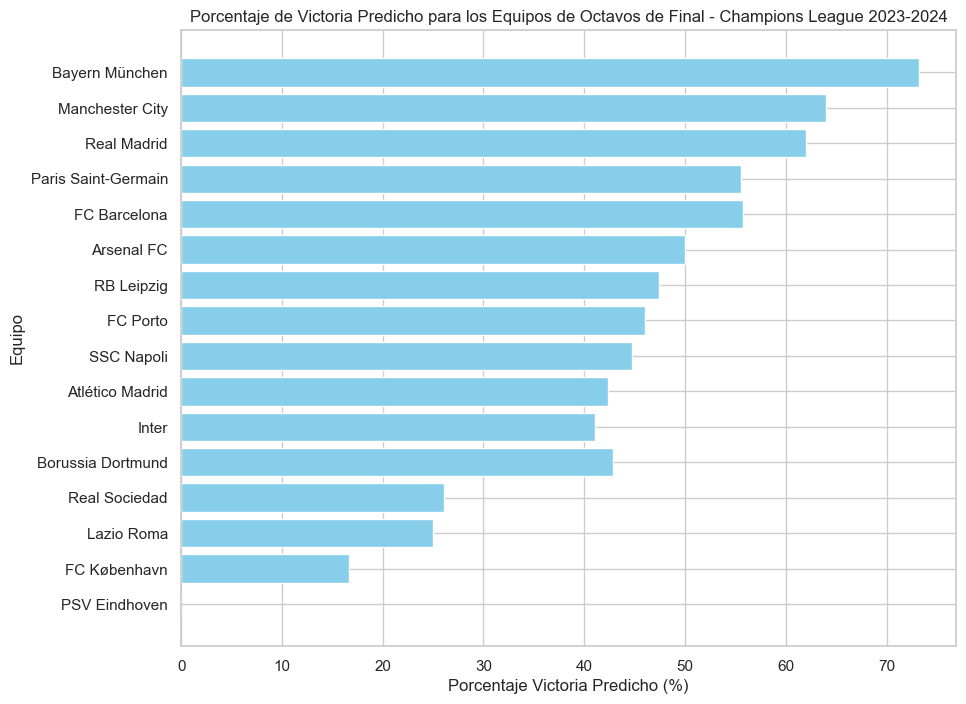

In [15]:
#Visualización
#Recreamos el DataFrame df_porcentajes_victoria_sorted con datos de ejemplo basados en la salida anterior
df_porcentajes_victoria_sorted = pd.DataFrame({
    'Equipo': ['Bayern München', 'Manchester City', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Arsenal FC', 'RB Leipzig', 'FC Porto', 'SSC Napoli', 'Atlético Madrid', 'Inter', 'Borussia Dortmund', 'Real Sociedad', 'Lazio Roma', 'FC København', 'PSV Eindhoven'],
    'Porcentaje Victoria Predicho': [73.24, 64.00, 62.03, 55.56, 55.74, 50.00, 47.37, 46.00, 44.74, 42.37, 41.03, 42.86, 26.10, 25.00, 16.67, 0.00]
})

#Crear un gráfico de barras para representar los porcentajes de victoria predichos
plt.figure(figsize=(10, 8))
plt.barh(df_porcentajes_victoria_sorted['Equipo'], df_porcentajes_victoria_sorted['Porcentaje Victoria Predicho'], color='skyblue')
plt.xlabel('Porcentaje Victoria Predicho (%)')
plt.ylabel('Equipo')
plt.title('Porcentaje de Victoria Predicho para los Equipos de Octavos de Final - Champions League 2023-2024')
plt.gca().invert_yaxis()  
plt.show()